## ヘッブ則 (Hebbian theory)

シナプスの前後のニューロンが興奮するとそのシナプスが増強され、放置されてると減衰するという法則。  
ニューロンの結合強度を $ \Delta w $ で、ニューロンの交付度合い(入力)を $ y_i $ 、シナプスのニューロン興奮度合い(出力)を $ y_j $ 、係数を $\gamma$ とすると

$$
\Delta = \gamma y_i y_j
$$

## デルタ則(Delta rule, LMS rule, Window-Hoff rule)

ニューラルネットワークの学習ルール

* 出力と正解の差が大きければ重みの修正量を大きく
* 入力が大きいほど重みの修正量を大きく

正解値を $t$ 、学習係数を $\eta$ とすれば、重みの変化は

$$
\Delta w = \eta (y_j - t) y_i
$$

## バックプロパゲーション

バックプロパゲーションは、出力から入力方向への学習伝播の事。  
順伝播で入力に対する結果を求め、結果と目標値との誤差をを求め、誤差情報を1階層づつ逆伝播させる。

## 損失関数

誤差の大きさを求める関数のこと

### 二乗和誤差

これは前も言及してる

$$
E = \frac{1}{2} \sum_k (y_k - t_k)^2
$$

(出力 - 目標) を二乗してるので、分かりやすいはず。  
1/2 は微分で扱いやすくするため

In [1]:
import numpy as np


def square_sum(y, t):
    return 1.0/2.0 * np.sum(np.square(y - t))

### 交差エントロピー誤差

主に分類問題で使われる手法。  


$$
E = - \sum_k t_k log(y_k)
$$

ちょっと式変形すると、こうなるのだが

$$
E = \sum_k t_k -log(y_k)
$$

この時 $t_k$ は分類問題だと、`(0, 0, 1, 0, 0)` の様に一つだけ 1 という形をとってるので、この一つ以外は実質無視できる。  
で、 `-log` のグラフは、0 に近づくほど無限大となり、1 (目標値)に近づくほど 0 に収束する

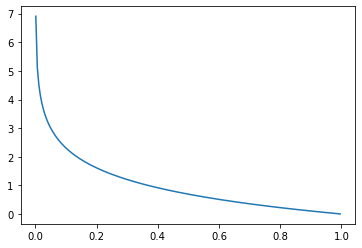

In [10]:
import matplotlib.pyplot as plt


def graph():
    X = np.arange(0.001, 1.0, 0.005)
    Y = -np.log(X)
    plt.plot(X, Y)
    plt.show()

graph()

In [ ]:
def cross_entropy(y, t):
    return -np.sum(t * np.log(y, 1e-7))

## 勾配降下法

原理は [以前やったコレ](https://white-azalea.hatenablog.jp/entry/2019/02/06/151359) とか [コレ](https://white-azalea.hatenablog.jp/entry/2019/02/18/210034) です。  
ただし、三次式の様に波打ってるデータに当たると、局所最適解（目の前にある最適に見える解）にハマって、真の最適解（帯域最適解）にたどり着けないという問題もある。

勾配降下法では偏微分で重みとバイアスを計算していく。  
w を重み、b をバイアス、E を誤差とすると

$$
  w \leftarrow w - \eta \frac{\partial E}{\partial w} \\
  b \leftarrow b - \eta \frac{\partial E}{\partial b}
$$

## 勾配を求める

三層 NN を想定してまずは以下の様に定義してみる

|層|添字|ニューロン数|
|----|----|----|
|入力|i|l|
|中間|j|m|
|出力|k|n|

### 出力層の勾配

$y_j$ で受け取って、$w_{jk}$ を掛けて、$b_k$ 足した結果 $u_k$ を活性関数に食わせたのが $y_k$ と、文字にしてみると却って分かりにくいな。

$$
u_k = y_j w_{jk} + b_k \\
y_k = f(u_k)
$$

勾配を求めるとするなら要するに微分なので

$$
  \partial w_{jk} = \frac{\partial E}{\partial w_{jk}}  \\
  = \frac{\partial E}{\partial u_k} \frac{\partial u_k}{\partial w_{jk}}  (※)
$$

※連鎖律を適用。連鎖律については [ここ](https://white-azalea.hatenablog.jp/entry/2021/02/11/171005) 参照

$ \frac{\partial u_k}{\partial w_{jk}} $ は $ u_k $ を展開すると

$$
\frac{\partial u_k}{\partial w_{jk}} = \frac{\partial (\sum^m_{q=1} y_q w_{qk} + b_k) }{\partial w_{jk}} \\
= \frac{\partial}{\partial w_{jk}} (y_1 w_{1k} + y_2 w_{2k} ... y_j w_{jk} ... + y_m w_mk + b_k)
$$

偏微分なので、$ w_{jk} $ のかかってない項はすべて 0 なので、 $ y_j $ となる。

次に $ \frac{\partial E}{\partial u_k} $ に焦点を当てて、こちらも連鎖律展開すると

$$
\frac{\partial E}{\partial u_k} = \frac{\partial E}{\partial y_k} \frac{\partial y_k}{\partial u_k}
$$

とりあえず上記を $ \delta_k $ としていれば

$$
\partial w_{jk} = y_j \delta_k
$$

という形に持っていける。

$ \partial b_k $ も同様の手順で考えると

$$
\partial b_k = \frac{\partial E}{\partial b_k} = \frac{\partial E}{\partial u_k} \frac{\partial u_k}{\partial b_k}
$$

$u_k$ を展開すると、最終的に 1 になるので、最終形態は $ \partial b_k = \delta_k $

